<!-- dataset 1
80.94710727457094 1e-06 2742.907868619646 None
80.34049376533933 54.674196526383206 2542.715511207578 [302.39512784 299.98729093]
80.40741481452056 1e-06 2651.8960431941096 None

dataset 2
533435.0080889168 22.274354563080006 2515.1732607200665
533488.2228744307 298.5601754764213 2519.525066776425 [300.13923787 299.94610773]
533218.2923134756 11.81695054460237 2505.7351321647266 None -->

In [3]:
from sol_3a1 import *
import matplotlib.pyplot as plt

# dataset1 result

|   | loss = NLL            | alpha_hat          | sigma_hat           | Z_hat                       |
|---|-----------------------|--------------------|---------------------|-----------------------------|
| mode11  |  80.94710727457094    | 1e-06              |  2742.907868619646  |  None                       |
| model2  | 80.34049376533933     | 54.674196526383206 | 2542.715511207578   | [302.39512784 299.98729093] |
| model3  | 80.40741481452056     | 1e-06              | 2651.8960431941096  | None                        |

# dataset2 result

|   | loss = NLL            | alpha_hat          | sigma_hat           | Z_hat                       |
|---|-----------------------|--------------------|---------------------|-----------------------------|
| mode11  |  533435.0080889168    | 22.274354563080006              |  2515.1732607200665  |  None                       |
| mode12  | 533488.2228744307     | 298.5601754764213 | 2519.525066776425   | [300.13923787 299.94610773] |
| mode13 | 533218.2923134756     | 11.81695054460237              | 2505.7351321647266  | None                        |

# Dataset 1

In [13]:
log_evidence1, evidence1 = compute_evidence(loss=80.94710727457094, alpha_hat=1e-06, sigma_hat=2742.907868619646, z_hat=None, param_number=6 ,phi=phi1)

-348.1763260173209 6.150959695998708e-152


In [14]:
log_evidence2, evidence2 = compute_evidence(loss=80.34049376533933, alpha_hat=54.674196526383206, sigma_hat=2542.715511207578, z_hat=[302.39512784,299.98729093], param_number=2, phi=phi2)

-79.37586775492639 3.368981589950336e-35


In [15]:
log_evidence3, evidence3 = compute_evidence(loss=80.40741481452056, alpha_hat=1e-06, sigma_hat=2651.8960431941096, z_hat=None, param_number=2, phi=phi3)

-346.7627993877606 2.52830635668627e-151


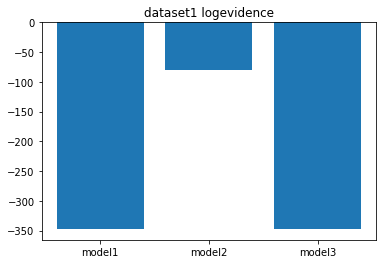

In [21]:
data = [log_evidence1, log_evidence2, log_evidence3]
label = ["model1","model2","model3"]
plt.bar(range(len(data)), data, tick_label=label)
plt.title('dataset1 logevidence')
plt.show()

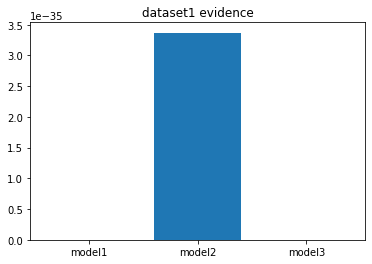

In [22]:
data = [evidence1, evidence2, evidence3]
label = ["model1","model2","model3"]
plt.bar(range(len(data)), data, tick_label=label)
plt.title('dataset1 evidence')
plt.show()

# Dataset 2

In [6]:
x=np.array([float(xi) for xi in scio.loadmat('./hw2files/occam2.mat')['x']], dtype=np.double)

In [4]:
log_evidence1, evidence1 = compute_evidence(loss=533435.0080889168, alpha_hat=22.274354563080006, sigma_hat=2515.1732607200665, z_hat=None, param_number=6 ,phi=phi1, x=x)

-614631.3936193986 0.0


In [13]:
log_evidence2, evidence2 = compute_evidence(loss=533488.2228744307, alpha_hat=298.5601754764213, sigma_hat=2519.525066776425, z_hat=[302.39512784,299.98729093], param_number=2, phi=phi2, x=x)

-355187.3938336382 0.0


In [14]:
# 533218.2923134756 11.81695054460237 2505.7351321647266 None
log_evidence3, evidence3 = compute_evidence(loss=533218.2923134756, alpha_hat=11.81695054460237, sigma_hat=2505.7351321647266, z_hat=None, param_number=2, phi=phi3, x=x)

-677589.2313579913 0.0


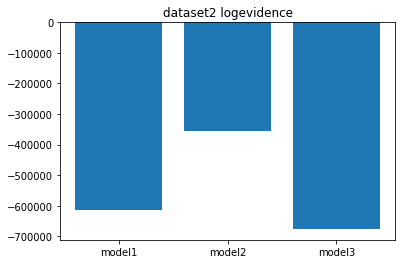

In [16]:
data = [log_evidence1, log_evidence2, log_evidence3]
label = ["model1","model2","model3"]
plt.bar(range(len(data)), data, tick_label=label)
plt.title('dataset2 logevidence')
plt.show()

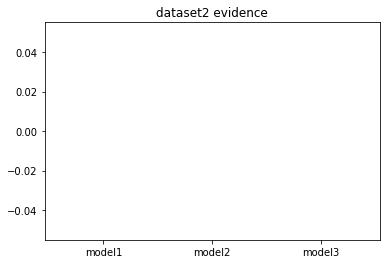

In [17]:
data = [evidence1, evidence2, evidence3]
label = ["model1","model2","model3"]
plt.bar(range(len(data)), data, tick_label=label)
plt.title('dataset2 evidence')
plt.show()

# Posterior

In [33]:
phi = phi2
alpha_hat = 298.5601754764213
sigma_hat = 2519.525066776425
z_hat = [300.13923787,299.94610773]
param_shape = 2

In [29]:
y=np.array([float(xi) for xi in scio.loadmat('./hw2files/occam2.mat')['y']], dtype=np.double)

In [28]:
phi_x = phi(x, z_hat)

In [26]:
m_0 = np.zeros(2)
print(m_0)

[0. 0.]


In [34]:
S_N = (1 / alpha_hat) * np.identity(param_shape) + (1 / sigma_hat) * phi_x.T @ phi_x
m_N = np.linalg.inv(S_N) @ ((1 / alpha_hat) * np.identity(param_shape) @ m_0 + (1 / sigma_hat) * phi_x.T @ y)

refer to bishop, we have the posterior update equation

we get posterior 

mean = [-1.05609318  3.05200373]

variance = 
[[39.67203114 39.67567358]
 [39.67567358 39.68601867]]

In [35]:
print(m_N,S_N)

[-1.05609318  3.05200373] [[39.67203114 39.67567358]
 [39.67567358 39.68601867]]
